# A cor dos objetos celestes

* PET - Física UFRN
* Petiano: Gabriel Wendell Celestino Rocha
* Data: 27 de Janeiro de 2021

O objetivo deste `Notebook` é analisar as cores dos objetos celestes. Inicialmente vamos abordar fundamentalmente a teoria por trás do tema e, em seguida, a realização de diagramas de cores com base em dados reais obtidos no catálogo BSC.

Este `Notebook` será dividido em duas partes: parte teórica e parte prática. Na primeira parte iremos fazer uma breve introdução teórica acerca da cor dos objetos celestes. Já na segunda parte iremos implementar a teoria vista até o momento trabalhando com dados reais extraídos do catálogo BSC.

## Pré-requisitos

Recomenda-se ao leitor que seja conhecedor de como funciona a radiação de corpo negro (você pode consultar um `Notebook` sobre o assunto na referência [3]. Além disso, é recomendável que o leitor seja conhecedor dos fundamentos básicos da Astronomia e/ou da Astrofísica.

### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import quantities as pq             # somente na parte 1 
import pandas as pd                 # somente na parte 2
import numpy as np

%matplotlib notebook

Com relação à biblioteca `quantities` que importamos acima, você pode encontrar mais informações sobre a mesma checando a documentação dela [aqui](https://pythonhosted.org/quantities/) e pode conferir um exemplo de aplicação dessa biblioteca em Astrofísica e Cosmologia consultando a referência [3].

Vamos usar também a magic extension `%version_information` do `IPython` para gerar um quadro com as informações sobre quais versões das bibliotecas que foram usadas para executar este `Notebook`.

Você pode instalar a extensão `%version_information` usando o `pip` executando o seguinte comando no seu terminal :

`pip install version_information`

In [2]:
%load_ext version_information
%version_information Matplotlib, Quantities, Pandas, Numpy

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.10.0
OS Windows 10 10.0.19041 SP0
Matplotlib 3.1.2
Quantities 0.12.4
Pandas 0.25.3
Numpy 1.17.4
Wed Jan 20 15:44:15 2021 Hora Padrão de Buenos Aires

Dada essa explicação, vamos à parte teórica deste `Notebook`.

## 1. Introdução teórica

### Magnitudes aparentes

Um objeto celeste de magnitude aparente 1 é, por definição, 100 vezes mais brilhante do que um objeto de magnitude 6.

Portanto, atribuindo provisoriamente ao objeto de magnitude 6 um brilho unitário aparente, e chamando de $k$ a razão entre uma magnitude aparente de valor $m$ e uma magnitude de valor $m+1$, podemos raciocinar como indicado na tabela abaixo:

| Magnitude | 1 | 2 | 3 | 4 | 5 | 6 |
| --------- | - | - | - | - | - | - |
| **Brilho aparente** | $k^{5}$ | $k^{4}$ | $k^{3}$ | $k^{2}$ | $k$ | 1 |

Portanto, sendo $k^{5}=100$, o valor de $k$ será:

$$k=\sqrt[5]{100}=100^{\frac{1}{5}}$$

In [3]:
k = 100**(1./5)
print(k)

2.51188643150958


Na realidade, a magnitude que define rigorosamente o brilho de uma estrela percebida por um observador é o **fluxo radiante**, definido como a quantidade de energia em uma determinada banda de comprimento de onda, que é recebida em uma unidade de área orientada perpendicular ao caminho da luz por unidade de tempo. É medido em Watts por metro quadrado ($W\cdot m^{-2}$).

Seja $F$ o fluxo radiante recebido de uma estrela, e seja $F_{Vega}$ o fluxo radiante da estrela Vega, que é tomado como referência de magnitude 0 em todos os comprimentos de onda, teremos:

| **Magnitude** | 0 | 1 | 2 | $\ldots$ | $m$ |
| :--- | :---: | :---: | :---: | :---: | ---: |
| **Fluxo** | $F_{Vega}$ | $\frac{1}{k}F_{Vega}$ | $\frac{1}{k^{2}}F_{Vega}$ | $\ldots$ | $$\frac{1}{k^{m}}F_{Vega}$$ | 

Se considerarmos agora duas estrelas de magnitudes relativas $m_{1}$ e $m_{2}$, e seus fluxos radiantes correspondentes $F_{1}$ e $F_{2}$, expressando ambos em termos de $F_{Vega}$, dividindo ambas as expressões e simplificando, a seguinte relação é obtida:

$$\frac{F_{2}}{F_{1}}=k^{m_{1}-m_{2}}$$

E substituindo $k$ por seu valor, chegamos à seguinte fórmula fundamental:

$$\frac{F_{2}}{F_{1}}=100^{\frac{m_{1}-m_{2}}{5}}$$

Outra forma muito comum de expressar a relação entre magnitudes aparentes e fluxos radiantes é tomando logaritmos decimais na expressão anterior, o que leva à expressão comumente usada (note que o quociente entre fluxos radiantes foi invertido, o que faz aparecer o sinal negativo):

$$\boxed{\Delta m=m_{1}-m_{2}=-2.5\log_{10}{\Bigg(\frac{F_{1}}{F_{2}}\Bigg)}}$$

### Magnitudes absolutas

Logicamente, a magnitude aparente de um objeto dependerá tanto de sua luminosidade intríseca quanto da distância que está de nós. Portanto, é interessante definir uma magnitude absoluta que nos dê uma ideia da quantidade de energia emitida pelo objeto, independentemente da distância a que se encontre.

Previamente devemos especificar o conceito de **luminosidade** $L$ de um objeto, que é definido como a quantidade de energia total emitida pelo objeto em um segundo. Esta magnitude $L$ tem relação com o fluxo radiante $F$, pois se assumirmos que o objeto está a uma distância $d$ de nós, a energia total irradiada por segundo será distribuída sobre uma superfície esférica de área $4\pi d^{2}$, portanto a energia que recebermos por unidade de área em um segundo será:

$$F=\frac{L}{4\pi d^{2}}$$

**OBS:** Na verdade, a expressão anterior é apenas uma aproximação, uma vez que parte da energia luminosa irradiada é absorvida ou dispersa em maior ou menor grau pela poeira e pelo gás existente no meio interestelar.

Vamos agora definir a **magnitude absoluta** $M$ de um objeto como a magnitude relativa que esse objeto teria se estivesse a uma distância de 10 parsec (10 pc).

Partindo das fórmulas anteriores, vamos deduzir uma expressão para obter a diferença $m-M$ entre a magnitude aparente e a magnitude absoluta de um objeto. Vamos representar por $F$ o fluxo radiante que realmente medimos e por $F_{10}$ o fluxo radiante que mediríamos se o objeto estivesse a 10 pc de nós.

Que geralmente é escrito como:

$$\boxed{m-M=5\log_{10}{\Bigg(\frac{d}{10}\Bigg)}}$$

Onde a distância $d$ será expressa em parsec (pc).

Esta simples expressão permite, em princípio, calcular a magnitude absoluta a partir da magnitude aparente, ou vice-versa, mas a distância que nos separa do objeto naturalmente faz parte da equação. Na verdade, se conhecermos o valor de $m-M$, será posspivel sabermos também a distância $d$. Portanto, a magnitude $m-M$ pode ser vista como uma forma de expressar a distância que nos separa da estrela em escala logarítmica, por isso é conhecida como módulo de distância.

#### Exemplo:

A estrela Vega está a uma distância de 8.1 pc. Qual é a sua magnitude absoluta e o seu módulo de distância?

In [4]:
# Vega é a referência para a magnitude aparente 0:
m = 0 
M = -5 * np.log10(8.1/10)

print('M(Vega) = %.2f' %M)
print('Módulo de distância de Vega: %.2f' %(m-M))

M(Vega) = 0.46
Módulo de distância de Vega: -0.46


### Magnitudes aparentes em um sistema de filtros de cor

Na prática, a magnitude aparente de um objeto pode ser medida considerando a radiação recebida em todos os comprimentos de onda, caso em que é chamada de **magnitude bolométrica**, ou passando a luz por filtros de cores diferentes. Um sistema de filtro comumente usado para essa finalidade é chamado de **sistema fotométrico UBV** (ou *sistema fotométrico de Johnson*), que é composto por três filtros com as seguintes características:

| **Filtro** | $\lambda$ (Angstroms) | $\Delta\lambda$ (largura da banda) |
| :--- | :---: | ---: |
| **Ultravioleta** ($u$) | $3650$ | $680$ |
| **Blue** ($b$) | $4400$ | $980$ |
| **Visible** ($v$) | $5500$ | $890$ |

O filtro $u$ deixa a luz passar na região ultravioleta, o filtro $b$ na região azul e o filtro $v$ na região verde.

As magnitudes aparentes medidas com estes filtros são representadas pelas iniciais $U$, $B$ e $V$ (note que, mesmo no caso de magnitudes aparentes, neste caso são utilizadas letras maiúsculas).

### Índices de cor

A magnitude aparente de um corpo, considerada isoladamente, não é um bom indicador das propriedades desse objeto. Imagine que queremos descobrir algo sobre a cor da luz emitida por uma estrela e, ao passá-la por um filtro azul, medimos uma magnitude aparente fraca (ou seja, um valor elevado para $m$). Não poderemos saber se isso se deve ao fato de que a estrela irradia pouca energia nessa faixa de comprimento de onda ou se é simplesmente uma estrela muito distante. Em última análise, para saber a cor de uma estrela, devemos comparar sua magnitude aparente medida por pelo menos dois filtros.

Por este motivo, os índices de cor são definidos, como a diferença entre duas grandezas aparentes com dois filtros diferentes. Por exemplo, no sistema fotométrico $UBV$ teremos dois índices de cores:

- Índice de cor $U-B$ : Diferença entre as magnitudes aparentes ultravioleta e azul;
- índice de cor $B-V$ : Diferença entre as magnitudes aparentes azul e visível.

Observe que, de acordo com a definição anterior de módulo de distância, a relação entre as quantidades aparentes e as quantidades absolutas pode ser escrita como:

$$m=M+\mu$$

Sendo $\mu$ o módulo de distância do objeto. Portanto:

$$\text{Índice de cor}=\Delta m=m_{1}-m_{2}=M_{1}-M_{2}$$

Isso é equivalente a dizer que, um índice de cor é independente da distância na qual o objeto se encontra!

### Relação entre o índice de cor e a temperatura

Uma razão pela qual os índices de cor de objetos astronômicos são tão importantes é por causa de sua estreita relação com a temperatura da superfície do objeto. As estrelas irradiam seguindo um espectro que em uma primeira aproximação se aproxima do espectro de radiação de um corpo negro, que depende exclusivamente da temperatura. Em um post [3] anterior, foi mostrado como usar a função de Planck para calcular a radiação que um corpo negro emite em cada comprimento de onda e para uma determinada temperatura. Vamos usar esta função novamente:

In [5]:
def B(wl,T):
    '''
    - input:
    wl : Matriz de comprimentos de onda com unidades de comprimento
    T : Temperatura expressa em Kelvin
    
    - output:
    Matriz de valores de radiância espectral com unidades W/(m**2 * nm * sr)
    '''
    
    I = 2 * pq.constants.h * (pq.c)**2 / wl**5 *  \
         1 / (np.exp((pq.constants.h*pq.c \
         / (wl*pq.constants.k*T)).simplified)-1)
        
    return I.rescale(pq.watt/(pq.m**2 * pq.nm *pq.sr))

Proponho-me agora a mostrar, assumindo que as estrelas eram corpos negros perfeitos, qual seria a variação do índice de cor em função da temperatura. Para isso, vou seguir a abordagem para o cálculo dos índices de cor da função de Planck que é exposta no livro [An Introduction to Modern Astrophysics](https://www.amazon.com/Introduction-Modern-Astrophysics-2nd-Edition/dp/0805304029) [4] de Bradley W. Carroll e Dale A. Ostile, seção 3.6. Consiste em usar as seguintes aproximações:

$$U-B=-2.5\log_{10}{\Bigg(\frac{B(\lambda_{u},T)\Delta\lambda_{u}}{B(\lambda_{b},T)\Delta\lambda_{b}}\Bigg)}+C_{U-B}$$

$$B-V=-2.5\log_{10}{\Bigg(\frac{B(\lambda_{b},T)\Delta\lambda_{b}}{B(\lambda_{v},T)\Delta\lambda_{v}}\Bigg)}+C_{B-V}$$

Ou seja, na expressão já vista acima entre magnitudes e fluxos radiantes, trata-se de substituir cada fluxo radiante pelo produto da radiância espectral dada pela função de Planck para o comprimento de onda central de cada filtro, multiplicado pela largura da efetiva banda do referido filtro, e adicionando uma constante de ajuste.

As constantes de ajuste $C_{U-B}$ e $C_{B-V}$ devem ser determinados usando certos valores de $T$ e dos índices de cor que são usados para calibrar os filtros. Uma tabela com esses valores está incluída neste [artigo](https://www.atnf.csiro.au/outreach/education/senior/astrophysics/photometry_colour.html) [5]. Vamos usar em particular que para uma temperatura $T=42.000$ $K$ devemos obter valores dos índices de cor $U-B=-1,19$, $B-V=-0,33$.

#### Definição das contantes do sistema fotométrico UBV:

In [6]:
lambda_u = 365 * pq.nm
delta_u = 68 * pq.nm
lambda_b = 440 * pq.nm
delta_b = 98 * pq.nm
lambda_v = 550 * pq.nm
delta_v = 89 * pq.nm

#### Cálculo de $C_{U-B}$:

In [7]:
T = 42000*pq.kelvin
F = B(lambda_u, T) * delta_u/(B(lambda_b, T) * delta_b)
Cub = -1.19 + 2.5 * np.log10(F)

print(Cub)

-0.8743172782348059 dimensionless


#### Cálculo de $C_{B-V}$:

In [8]:
F = B(lambda_b, T) * delta_b/(B(lambda_v, T)* delta_v)
Cbv = -0.33 + 2.5 * np.log10(F)

print(Cbv)

0.6493684250633878 dimensionless


Tendo determinado as constantes na fórmula que aproxima os índices de cor da temperatura para um corpo negro, podemos definir duas funções que nos permitirão calcular esses índices de cor para diferentes temperaturas.

In [9]:
def get_UB(T):
    F = B(lambda_u, T) * delta_u/(B(lambda_b, T) * delta_b)
    return -2.5 * np.log10(F) + Cub

def get_BV(T):
    F = B(lambda_b, T) * delta_b/(B(lambda_v, T) * delta_v)
    return -2.5 * np.log10(F) + Cbv

E por último vamos representar em gráfico a curva que relaciona a temperatura da superfície do objeto com seu índice de cor, supondo, tenhamos sempre isso em mente, que o dito objeto era um corpo negro perfeito. Para objetos astronômicos reais, esta curva será apenas uma aproximação que nos permitirá uma primeira estimativa de sua temperatura de superfície em função do índice de cor.

Precisamente, para ilustrar este último fato, vamos representar no mesmo gráfico três estrelas representativas, com dados de suas temperaturas superficiais efetivas e índices de cor.

In [10]:
temp = np.arange(2500, 30000, 100) * pq.Kelvin
BmenosV = get_BV(temp)

Como de costume, definimos uma função para melhorar um pouco a estética dos plots:

In [11]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Agora vamos ao gráfico:

<IPython.core.display.Javascript object>


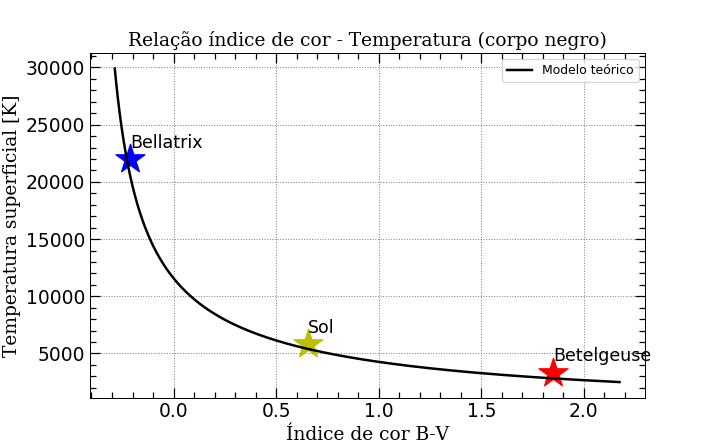

In [12]:
plt.figure(figsize=(8,5))

plt.plot(BmenosV, temp, lw=2, color='black', label=r'Modelo teórico')
plt.title(r'Relação índice de cor - Temperatura (corpo negro)', family='serif', fontsize='15')
plt.xlabel(r'Índice de cor B-V', family='serif', fontsize=15)
plt.ylabel(r'Temperatura superficial [K]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

# Desenhamos três estrelas representativas:

T = np.array([3300, 5800, 22000])*pq.kelvin
BV = [1.85, 0.656, -0.21]

plt.scatter(BV[0],T[0], s=600, c='r', marker='*')
plt.scatter(BV[1],T[1], s=600, c='y', marker='*')
plt.scatter(BV[2],T[2], s=600, c='b', marker='*')

# Anotamos os nomes das três estrelas:

plt.annotate("Betelgeuse", xy=(BV[0],T[0]+1000*pq.kelvin), size=14)
plt.annotate("Sol", xy=(BV[1],T[1]+1000*pq.kelvin), size=14)
plt.annotate("Bellatrix", xy=(BV[2],T[2]+1000*pq.kelvin), size=14);

plt.savefig('Relação índice de cor - Temperatura (corpo negro).png')

Na figura anterior, observa-se que a curva teórica anterior pode fornecer em muitos casos uma aproximação razoável para obter as temperaturas superficiais efetivas das estrelas a partir de seu índice de cor.

### Diagramas de cor-cor

Outro tipo de diagrama que é freqüentemente usado são os diagramas de cores nos quais um índice de cores diferente é representado em cada eixo, por exemplo: $U-B$ sobre $B-V$. O fato é que a maioria das estrelas está localizado em um gráfico de cores ao longo de uma banda bem definida conhecida como **"locus estelar"**. Esses diagramas são úteis para, por exemplo, detectar objetos atípicos que estão localizados em um diagrama de cor-cor que se situam fora do locus.

Em outras entradas mais adiante, geraremos diagramas cor-cor com dados reais, mas neste ponto vamos nos perguntar como seria o diagrama cor-cor de um corpo negro ideal. A resposta é, como veremos, que seria uma linha reta! O local estelar dos diagramas "cor-cor" de objetos reais ficará, até certo ponto, ao redor dessa linha.

Outra conclusão que podemos tirar do gráfico a seguir é que os objetos mais quentes estão localizados no canto esquerdo inferior do gráfico, e os mais frios no extremo oposto.

<IPython.core.display.Javascript object>


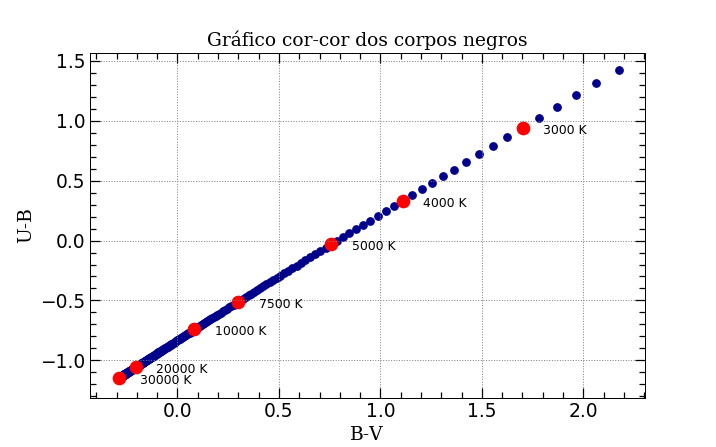

In [13]:
plt.figure(figsize=(8,5))

temp = np.arange(2500, 30000, 100)*pq.kelvin
BmenosV = get_BV(temp)
UmenosB= get_UB(temp)

plt.scatter(BmenosV, UmenosB, c='darkblue')
plt.title(r'Gráfico cor-cor dos corpos negros', family='serif', fontsize=15)
plt.xlabel(r'B-V', family='serif', fontsize=15)
plt.ylabel('U-B', family='serif', fontsize=15)
opt_plot()

temp = np.array([3000, 4000, 5000, 7500, 10000, 20000, 30000])*pq.kelvin
BmenosV = get_BV(temp)
UmenosB = get_UB(temp)

plt.scatter(BmenosV, UmenosB, s=100., c='red')

for t in temp:
    plt.annotate('%d K' %t, xy=(get_BV(t)+0.1, get_UB(t)-0.05))
    
plt.savefig('Gráfico cor-cor dos corpos negros.png')

$\text{ }$

## 2. Trabalhando com dados reais

Agora vamos examinar os dados em um catálogo de estrelas que contém dados fotométricos e espectrográficos e formaremos com elas gráficos cor-cor em que tentaremos diferenciar entre as diferentes classes de estrelas. Ou seja, vamos aplicar os conceitos expostos anteriormente a dados reais.

O catálogo que vamos usar é o "*Bright Star Catalogue"*, que inclui praticamente todas as estrelas visíveis a olho nu, até magnitude 6.5 ou mais brilhantes. Aqui está uma primeira [descrição](https://heasarc.gsfc.nasa.gov/W3Browse/star-catalog/bsc5p.html).

Este catálogo está disponível [online](http://tdc-www.harvard.edu/catalogs/bsc5.html) [6] aqui. Para seguir os exercícios desta entrada, os três arquivos que compõem o catálogo devem ser baixados deste site:

- `bsc5.dat` : O catálogo
- `bsc5.readme` : Uma descrição do catálogo
- `bsc5.notes` : Notas do catálogo

Um artigo útil será esse [aqui](https://www.enchantedlearning.com/subjects/astronomy/stars/startypes.shtml) [7] dedicado à classificação das estrelas pelas características de seu espectro.

### Leitura dos dados do *Bright Star Catalogue* (BSC)

Depois de fazer o download dos três arquivos que compõem o BSC, vamos ler uma série de campos, importando-os para um dataframe do `Pandas`. Sobre esta algumas observações:

- A estrutura das entradas na BSC é detalhada no arquivo `bsc5.readme`, junto com uma breve descrição.
- Não vamos ler todos os campos, mas apenas aqueles que vamos usar mais tarde.
- Como estamos lidando com registros com campos de largura fixa, usaremos a função `read_fwf()` da biblioteca `Pandas` (você pode checar a documentação dessa biblioteca clicando [aqui](https://pandas.pydata.org/docs/)) que nos permite fornecer uma descrição da posição inicial e comprimento de cada campo.

In [14]:
colspecs = [(0,4), (4,14), (25,31), (31,37), (41,42), (43,44), (51,60), 
            (90,96), (96,102), (102,107), (109,114), (115,120), (127,147)]

In [15]:
labels =['HR', 'Name', 'HD', 'SAO', 'IRflag', 'Multiple', 'VarID', 
         'GLON', 'GLAT', 'Vmag', 'B-V', 'U-B', 'SpType']

In [16]:
bsc = pd.read_fwf('bsc5.dat', header= None, colspecs=colspecs,
                    names=labels, index_col=0)

Vamos ver uma amostra dos dados:

In [17]:
bsc.head()

,Name,HD,SAO,IRflag,Multiple,VarID,GLON,GLAT,Vmag,B-V,U-B,SpType
HR,,,,,,,,,,,,
1,NaN,3.0,36042.0,NaN,NaN,NaN,114.44,-16.88,6.70,0.07,0.08,A1Vn
2,NaN,6.0,128569.0,NaN,NaN,NaN,98.33,-61.14,6.29,1.10,1.02,gG9
3,33 Psc,28.0,128572.0,I,NaN,Var?,93.75,-65.93,4.61,1.04,0.89,K0IIIbCN-0.5
4,86 Peg,87.0,91701.0,NaN,NaN,NaN,106.19,-47.98,5.51,0.90,NaN,G5III
5,NaN,123.0,21085.0,NaN,NaN,V640 Cas,117.03,-3.92,5.96,0.67,0.20,G5V


In [18]:
bsc.tail()

,Name,HD,SAO,IRflag,Multiple,VarID,GLON,GLAT,Vmag,B-V,U-B,SpType
HR,,,,,,,,,,,,
9106,NaN,225233.0,255629.0,NaN,NaN,NaN,307.68,-43.80,7.31,0.44,0.01,F2V
9107,NaN,225239.0,53622.0,NaN,NaN,NaN,112.17,-27.24,6.12,0.62,0.09,G2V
9108,NaN,225253.0,255631.0,NaN,NaN,NaN,308.18,-45.21,5.59,-0.12,-0.42,B8IV-V
9109,NaN,225276.0,73731.0,I,NaN,NaN,110.22,-35.07,6.25,1.40,1.59,K4IIIb
9110,NaN,225289.0,10962.0,NaN,NaN,V567 Cas,117.40,-1.06,5.80,-0.09,-0.32,B8IVpHgMn


### Diagrama cor-cor da sequência principal

O objetivo final deste `Notebook` é fazer diagramas cor-cor dos diferentes tipos de estrelas, ou seja, classes espectrais para as quais começaremos com as estrelas da sequência principal. Utilizaremos os índices de cores do sistema **UBV**, por serem estes os recolhidos no BSC.

Este é o nome dado às estrelas (que constituem aproximadamente 80% da população estelar) que usam hidrogênio como combustível em seus processos de fusão nuclear.

Para diferenciar essas estrelas das demais, usaremos o campo de tipo espectral do BSC (a coluna do dataframe com o nome *SpType*). O BSC usa o sistema de classificação Morgan-Keenan (MK), que inclui a classificação no esquema de cassificação de Harvard (PBAFGKM mais um numeral 0-9), ao qual é adicionada uma classificação baseada na luminosidade, que usa algarismos romanos I-VI, aos quais às vezes é adicionada uma letra minúscula "*a"* ou "*b"*. Exemplos da classificação resultantes são: "*B5III"*, "*A5Ia"*, "*K0V"* e assim por diante. Em particular, o "*V"* significa "*sequência principal*", que é o que nos permitirá reconhecer as estrelas pertencentes à sequência principal.

**Observação importante** : Note que o "*Bright Star Catalogue"* inclui apenas as estrelas mais brilhantes, basicamente aquelas que são visíveis a olho nu, portanto, o número de estrelas de uma determinada classe espectral no catálogo não é representativo de forma alguma de sua abundância no universo. As estrelas menos brilhantes ou mais distantes não serão representadas no BSC.

Quantos tipos espectrais existem no catálogo?

In [19]:
bsc['SpType'].nunique()

1975

Existem alguns tipos espectrais sem dados (marcados como `NaN` no `Pandas`)?

In [20]:
pd.isnull(bsc['SpType']).sum()

14

São 14. Vamos remover essas entradas do dataframe:

In [21]:
b = pd.notnull(bsc['SpType'])
bsc = bsc[b]
bsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096 entries, 1 to 9110
Data columns (total 12 columns):
Name        3143 non-null object
HD          9096 non-null float64
SAO         9071 non-null float64
IRflag      1743 non-null object
Multiple    1577 non-null object
VarID       2172 non-null object
GLON        9096 non-null float64
GLAT        9096 non-null float64
Vmag        9096 non-null float64
B-V         8786 non-null float64
U-B         7206 non-null float64
SpType      9096 non-null object
dtypes: float64(7), object(5)
memory usage: 923.8+ KB


No resumo anterior, verificamos que o dataframe já tem 14 entradas a menos e o campo `SpType` não possui valores não nulos.

Em seguida, vamos selecionar as estrelas na sequência principal, criando um novo dataframe que chamaremos de `main()`. São aqueles que na classificação MK possuem classe de brilho "V":

In [22]:
b1 = bsc['SpType'].str.contains('V')
b2 = bsc['SpType'].str.contains('IV')
b3 = bsc['SpType'].str.contains('VI')

Classes de luminosidade do tipo "V", não "IV", ou "VI" ou "VII":

In [23]:
b = np.logical_and(b1,np.logical_and(np.logical_not(b2),np.logical_not(b3)))
main = bsc[b]
main.shape

(3025, 12)

Vamos fazer uma primeira verificação visual:

In [24]:
main[0:10]

,Name,HD,SAO,IRflag,Multiple,VarID,GLON,GLAT,Vmag,B-V,U-B,SpType
HR,,,,,,,,,,,,
1,NaN,3.0,36042.0,NaN,NaN,NaN,114.44,-16.88,6.70,0.07,0.08,A1Vn
5,NaN,123.0,21085.0,NaN,NaN,V640 Cas,117.03,-3.92,5.96,0.67,0.20,G5V
8,NaN,166.0,73743.0,NaN,NaN,33,111.26,-32.83,6.13,0.75,0.33,K0V
9,NaN,203.0,166053.0,NaN,NaN,NaN,52.21,-79.14,6.18,0.38,0.05,A7V
10,NaN,256.0,147090.0,NaN,NaN,NaN,74.36,-75.90,6.19,0.14,0.10,A6Vn
12,NaN,319.0,166066.0,NaN,NaN,46,55.56,-79.07,5.94,0.14,0.06,A2Vp:
24,Kap1Scl,493.0,166083.0,NaN,NaN,NaN,25.24,-80.63,5.42,0.42,0.08,F2V
26,34 Psc,560.0,91750.0,NaN,NaN,NaN,106.87,-50.43,5.51,-0.07,-0.24,B9Vn
32,NaN,661.0,255642.0,NaN,W,NaN,306.98,-43.58,6.64,0.37,0.06,F2V+F6V


Agora queremos verificar se a primeira letra dessas classes espectrais está na sequência O, B, A, F, G, K, M:

In [25]:
main['SpType'].map(lambda s:s[0]).unique()

array(['A', 'G', 'K', 'F', 'B', 'M', 'O'], dtype=object)

Agora preparamos um dicionário Python com os códigos de cores que iremos atribuir a cada classe espectral, que irá de azul (tipo O) para vermelho (tipo M):

In [26]:
colors = {'O':'#0000FF', 'B':'#CCCCFF', 'A':'#FFFFFF', 'F':'#FFFFB2', 'G':'#FFFF00', 
          'K':'#FFA500', 'M':'#FF0000'}

Agora geramos o diagrama cor-cor com a biblioteca `Matplotlib` do Python:

<IPython.core.display.Javascript object>


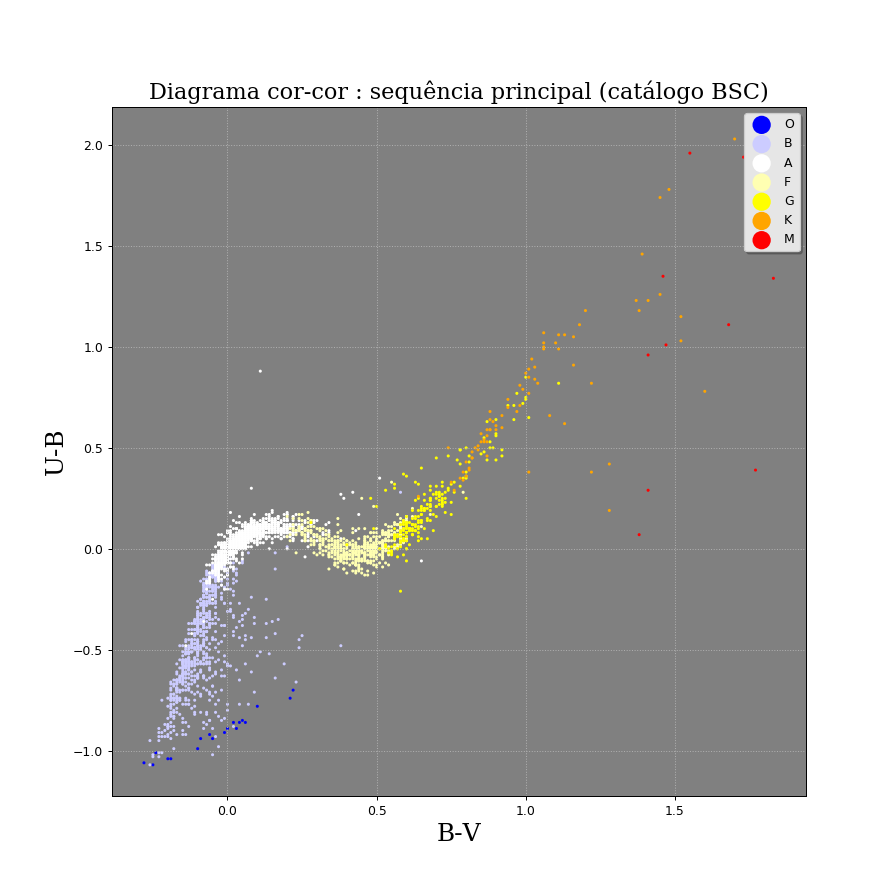

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('gray')
plt.title(u'Diagrama cor-cor : sequência principal (catálogo BSC)', family='serif', fontsize=18)
plt.xlabel('B-V', family='serif', fontsize=20)
plt.ylabel('U-B', family='serif', fontsize=20)
ax.grid(True, linestyle=':')

for cls in 'OBAFGKM':
    f = lambda s: s[0] == cls
    b = main['SpType'].astype(str).map(f)
    x = main[b]['B-V']
    y = main[b]['U-B']
    c = colors[cls]
    plt.scatter(x, y, c = c, s=6, edgecolors='none', label = cls)

legend = ax.legend(scatterpoints=1,markerscale = 6, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.savefig('Diagrama cor-cor - sequência principal (catálogo BSC) 1.png')

Nota-se que existem muito poucas estrelas da classe M, mas isso porque estamos considerando apenas aquelas visíveis a olho nu e elas estão obscurecidas. Na verdade, elas são as mais abundantes.

### Diagrama cor-cor das estrelas gigantes

Veremos se existem estrelas anãs no BSC, entendidas como aquelas correspondentes às classes de luminosidade VI e VII.

In [28]:
b = bsc['SpType'].str.contains('VI')
bsc[b].shape

(0, 12)

Vemos que não há estrelas desse tipo no catálogo do BSC, o que era de se esperar, pois é um catálogo de estrelas mais brilhantes do céu. Isso significa que não há valores "VI" ou VII" no campo SpType, que serão levados em consideração ao fazer a seleção.

Portanto, vamos incorporar ao gráfico as estrelas pertencentes às classes de brilho dos tipos gigantes:

- I : Supergigantes
- II : Gigantes brilhantes 
- III : Gigantes normais
- IV : Subgigantes

Vamos ver quantas estrelas existem dessas classes no BSC:

In [29]:
b =  bsc['SpType'].str.contains('I')
giants = bsc[b]
giants.shape

(5161, 12)

E então vamos ver se novas classes espectrais aparecem entre elas, além do usual O, B, A, F, G, K, M : 

In [30]:
giants['SpType'].map(lambda s:s[0]).unique()

array(['K', 'G', 'B', 'F', 'M', 'A', 'O', 'S', 'C', 'W'], dtype=object)

Vemos que novas classes espectrais mais exóticas aparecem: W (estrelas azuis brilhantes que têm principalmente hélio em vez de hidrogênio em suas atmosferas), e as estrelas de carbono dos tipos C e S, gigantes e supergigantes vermelhas nas fases finais de sua evolução, então vamos expandir nosso dicionário de cores para acomodar esses novos tipos:

In [31]:
colors = {'O':'#0000FF', 'B':'#CCCCFF', 'A':'#FFFFFF', 'F':'#FFFFB2', 'G':'#FFFF00', 'K':'#FFA500', 'M':'#FF0000',
          'W':'#000099' ,'S':'#B80000', 'C':'#780000'}

A seguir veremos qual é a incidência dos novos tipos W, S e C. No gráfico abaixo veremos que sua presença no BSC é muito escassa, e no caso de estrelas de carbono sua posição em um esquema de cor-cor está ocupando posições muito extremas (magnitudes muito altas e, portanto, baixa temperatura e cor vermelha intensa).

<IPython.core.display.Javascript object>


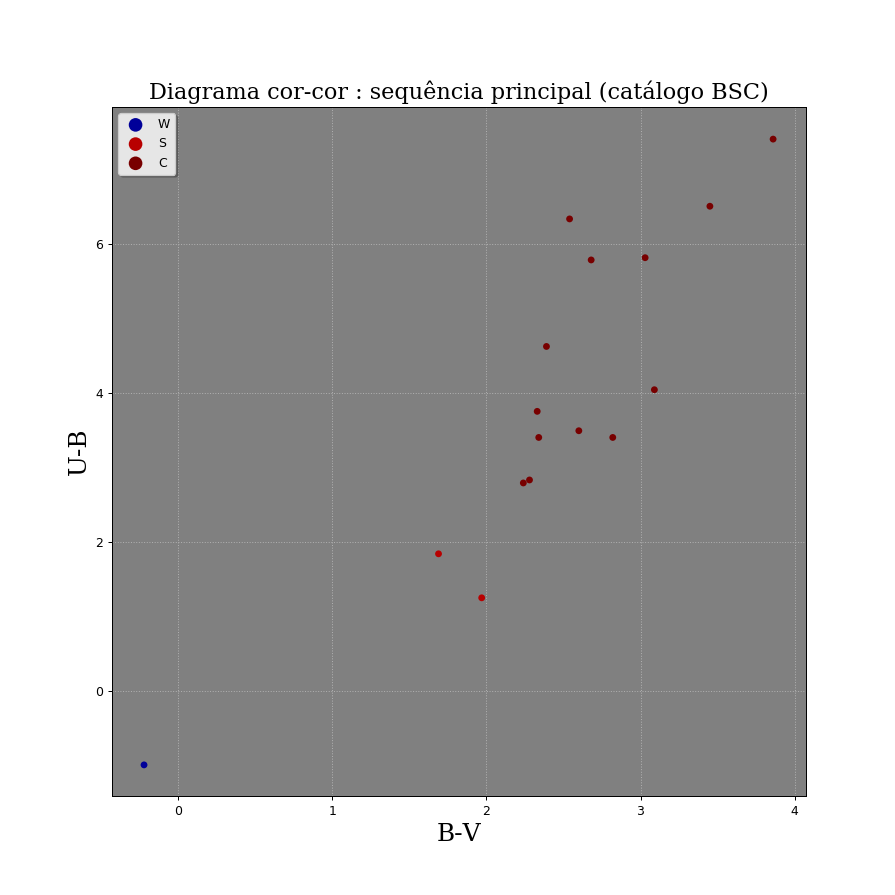

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('gray')
ax.grid(True, linestyle=':')
ax.set_title(u'Diagrama cor-cor : sequência principal (catálogo BSC)', family='serif', fontsize=18)
plt.xlabel('B-V', family='serif', fontsize=20)
plt.ylabel('U-B', family='serif', fontsize=20)
ax.yaxis.label.set_fontsize(20)

for cls in 'WSC':
    f = lambda s: s[0] == cls
    b = giants['SpType'].astype(str).map(f)
    x = giants[b]['B-V']
    y = giants[b]['U-B']
    c = colors[cls]
    ax.scatter(x, y, c = c, s=30,
               edgecolors='None', label = cls)

legend = ax.legend(scatterpoints=1,markerscale = 2, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.savefig('Diagrama cor-cor - sequência principal (catálogo BSC) 2.png')

Dada a escassez de estrelas das classes W, S e C no catálogo do BSC, uma vez que vimos onde estão localizadas nos gráficos cor-cor, vamos omitir sua representação, pois sua inclusão alteraria muito a escala dos eixos. A seguir geraremos um gráfico no qual iremos sobrepor as estrelas da sequência principal e as gigantes, com exceção dos tipos W, S e C. Para diferenciá-las, agora serão representadas as estrelas da sequência principal com pequenos pontos pretos, enquanto estrelas gigantes (tipos I, II, III e IV) serão exibidas com cores convencionais e discos semitransparentes.

<IPython.core.display.Javascript object>


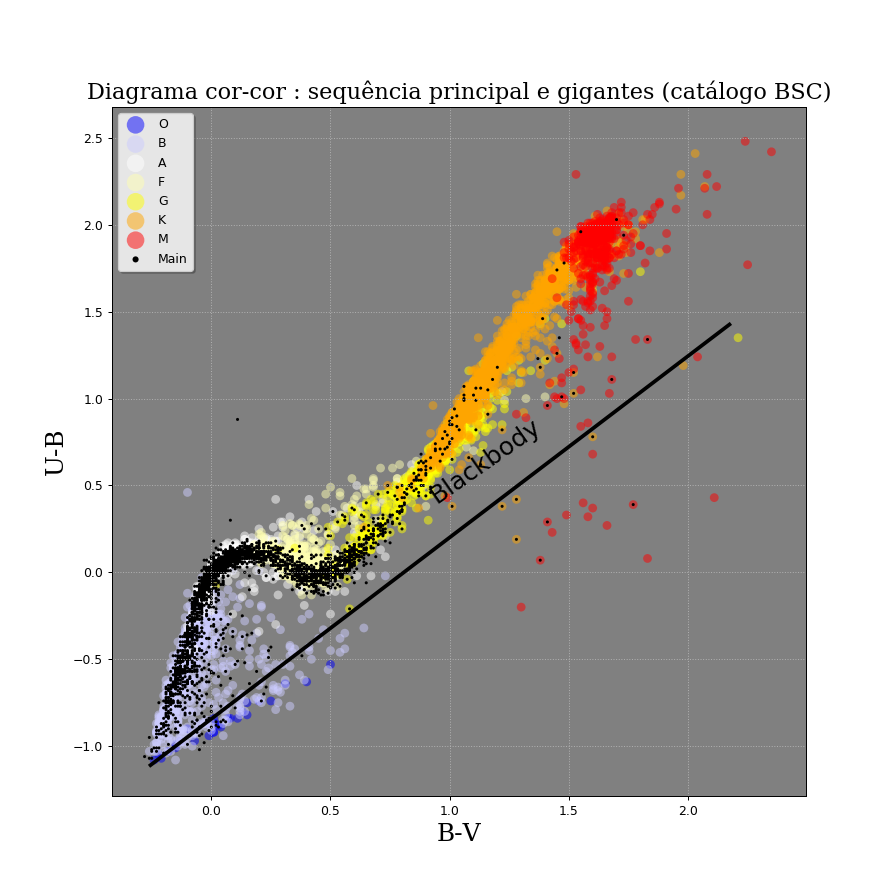

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_xlim(-1, 6)
# ax.set_ylim(-1, 2.5)
ax.set_facecolor('gray')
plt.grid(True, linestyle=':')
plt.title(u'Diagrama cor-cor : sequência principal e gigantes (catálogo BSC)', family='serif', fontsize=18)
plt.xlabel('B-V', family='serif', fontsize=20)
plt.ylabel('U-B', family='serif', fontsize=20)

for cls in 'OBAFGKM':
    f = lambda s: s[0] == cls
    b = giants['SpType'].astype(str).map(f)
    x = giants[b]['B-V']
    y = giants[b]['U-B']
    c = colors[cls]
    ax.scatter(x, y, c = c, s=50, alpha = 0.5,
               edgecolors='None', label = cls)

x = main['B-V']
y = main['U-B']
ax.scatter(x, y, c = 'black', s=6, edgecolors='none',
           label='Main')    
    
legend = ax.legend(scatterpoints=1, markerscale = 2,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.savefig('Diagrama cor-cor - sequência principal e gigantes (catálogo BSC).png')

T1 = 2500 * pq.kelvin
T2 = 25000 * pq.kelvin

BminusV_1 = get_BV(T1)
UminusB_1 = get_UB(T1)
BminusV_2 = get_BV(T2)
UminusB_2 = get_UB(T2)

# Basta com dois pontos para determinar a linha
ax.plot([BminusV_1, BminusV_2], [UminusB_1, UminusB_2], lw = 3, c='k') 
ax.text(0.9,0.4,'Blackbody', fontsize=20, rotation = 35);

A figura acima apresenta características interessantes. A primeira, que é a radiação emitida pelas estrelas afastando-se em alguma medida daquela correspondente a um corpo negro (lembre-se de que se trata de uma linha reta). Estrelas não são corpos negros ideiais. A melhor aproximação é para as estrelas mais quentes (O e B na figura).

No entanto, a característica mais marcante é o desvio acentuado das estrelas de classe A da linha de emissão do corpo negro. Se o leitor observar a sequência principal, ela descreve uma curva em forma de U invertido que se divide e se aproxima da linha do corpo negro novamente. Esta característica ilustra o fenômeno "**Balmer Jump**" ou "**salto de Balmer**".

Basicamente, quando a temperatura da superfície da estrela atinge um valor crítico, o que ocorre com estrelas da classe espectral de A0, ocorre uma absorção dos fótons emitidos pelo interior da estrela na região do ultravioleta. Esses fótons são absorvidos pelos átomos de hidrogênio na superfície da estrela, excitando seus elétrons, o que resulta no aparecimento das linhas de absorção da série de Balmer do hidrogênio no espectro dessas estrelas. Isso implica que, como efeito da absorção desses fótons, a emissão da estrela na região do ultravioleta se enfraquece e a magnitude UB aumenta (lembre-se que quanto menor o fluxo radiante recebido, maior a magnitude), ou seja, assume valores positivos mais rápido do que corresponderiam a um corpo negro, separando-se abruptamente da referida linha, conforme mostrado na figura.

Da classe espectral A5, a temperatura da superfície da estrela diminui e há menos átomos de hidrogênio nos níveis de energia que permitem a captura desses fótons. Consequentemente, a radiação no ultravioleta se recupera e o índice de cor U-B para de aumentar. A curva se aproxima novamente, também abruptamente, da linha correspondente à radiação de um corpo negro.

Este fenômeno é perfeitamente explicado no livro de Keith Robinson: [Starlight - An Introduction to Stellar Physics for Amateurs](https://www.springer.com/gp/book/9781441907073) [8].

### Diagrama cor-cor das classes de luminosidade MK

Vamos agora fazer um conjunto de diagramas cor-cor para representar o comportamento nestes diagramas das diferentes classes de brilho do esquema MK.

Começamos com a criação de um dataframe apenas com estrelas da classe IV:

In [34]:
bIV = giants['SpType'].str.contains('IV')
giantsIV = giants[bIV]
giantsIV.shape

(1274, 12)

Agora criamos um dataframe com estrelas da classe III:

In [35]:
bIII = giants['SpType'].str.contains('III')
giantsIII = giants[bIII]
giantsIII.shape

(3525, 12)

Criamos um dataframe com estrelas da classe II:

In [36]:
bII = giants['SpType'].str.contains('II')
b = np.logical_and(bII, np.logical_not(bIII))
giantsII = giants[b]
giantsII.shape

(287, 12)

Por fim, criamos um dataframe com estrelas da classe I:

In [37]:
bI = giants['SpType'].str.contains('I')
b = np.logical_and(bI, np.logical_not(bII))
giantsI = giants[b]
giantsI.shape

(1349, 12)

Por fim, vamos à criação dos diagramas:

<IPython.core.display.Javascript object>


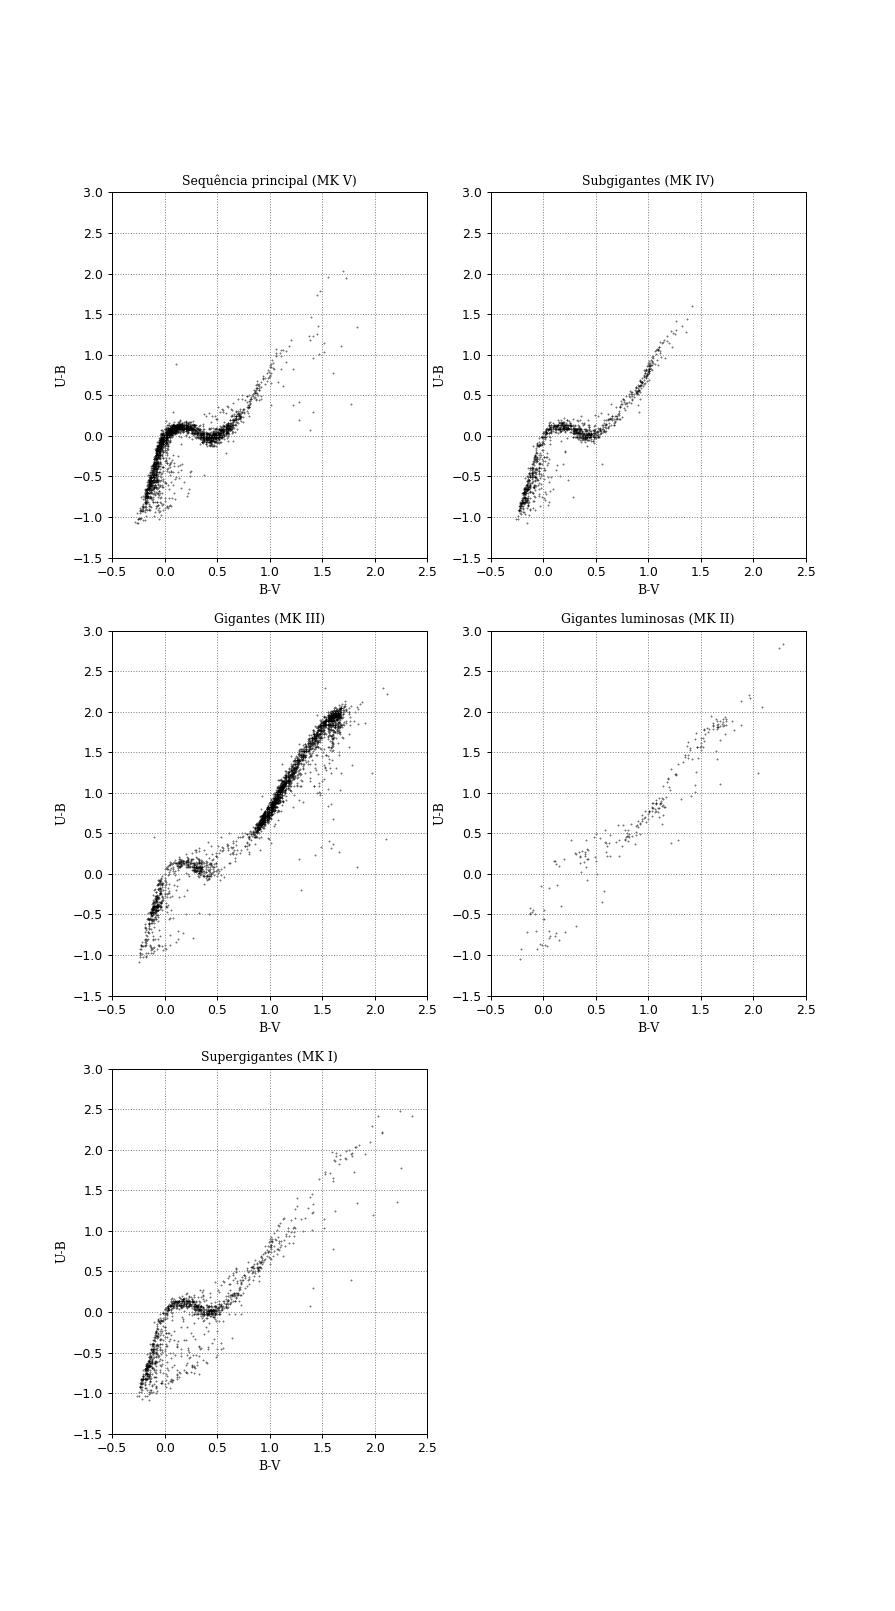

In [38]:
fig = plt.figure(figsize=(10,18))

ax1 = fig.add_subplot(321)
x = main['B-V']
y = main['U-B']
ax1.scatter(x, y, c = 'black', s=0.1)
ax1.set_title('Sequência principal (MK V)', family='serif', fontsize=10)
ax1.set_xlabel('B-V', family='serif', fontsize=10)
ax1.set_ylabel('U-B', family='serif', fontsize=10)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-1.5, 3)
ax1.grid(True, linestyle=':', color='0.50');


ax2 = fig.add_subplot(322)
x = giantsIV['B-V']
y = giantsIV['U-B']
ax2.scatter(x, y, c = 'black', s=0.1)
ax2.set_title('Subgigantes (MK IV)', family='serif', fontsize=10)
ax2.set_xlabel('B-V', family='serif', fontsize=10)
ax2.set_ylabel('U-B', family='serif', fontsize=10)
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-1.5, 3)
ax2.grid(True, linestyle=':', color='0.50');


ax3 = fig.add_subplot(323)
x = giantsIII['B-V']
y = giantsIII['U-B']
ax3.scatter(x, y, c = 'black', s=0.1)
ax3.set_title('Gigantes (MK III)', family='serif', fontsize=10)
ax3.set_xlabel('B-V', family='serif', fontsize=10)
ax3.set_ylabel('U-B', family='serif', fontsize=10)
ax3.set_xlim(-0.5, 2.5)
ax3.set_ylim(-1.5, 3)
ax3.grid(True, linestyle=':', color='0.50');


ax4 = fig.add_subplot(324)
x = giantsII['B-V']
y = giantsII['U-B']
ax4.scatter(x, y, c = 'black', s=0.1)
ax4.set_title('Gigantes luminosas (MK II)', family='serif', fontsize=10)
ax4.set_xlabel('B-V', family='serif', fontsize=10)
ax4.set_ylabel('U-B', family='serif', fontsize=10)
ax4.set_xlim(-0.5, 2.5)
ax4.set_ylim(-1.5, 3)
ax4.grid(True, linestyle=':', color='0.50');


ax5 = fig.add_subplot(325)
x = giantsI['B-V']
y = giantsI['U-B']
ax5.scatter(x, y, c = 'black', s=0.1)
ax5.set_title('Supergigantes (MK I)', family='serif', fontsize=10)
ax5.set_xlabel('B-V', family='serif', fontsize=10)
ax5.set_ylabel('U-B', family='serif', fontsize=10)
ax5.set_xlim(-0.5, 2.5)
ax5.set_ylim(-1.5, 3)
ax5.grid(True, linestyle=':', color='0.50');

plt.savefig('Diagramas MK V-VI-III-II-I.png')

### Referências

[1] *Mark Newman - Computational Physics (2013, University of Michigan)* 

[2] *Nicholas J. Giordano; Hisao Nakanishi - Computational Physics (2005, Addison-Wesley,Second Edition)*

[3] *A radiação do corpo negro e a radiação cósmica de fundo (CMB)* : https://github.com/GabrielWendell/PET/blob/main/Notebooks/A%20radia%C3%A7%C3%A3o%20do%20corpo%20negro%20e%20a%20radia%C3%A7%C3%A3o%20c%C3%B3smica%20de%20fundo%20(CMB).ipynb

[4] *Bradley W. Carroll; Dale A. Ostile - An Introduction to Modern Astrophysics (2006, Second Edition), sec. 3.6*

[5] *Colour of Stars* : https://www.atnf.csiro.au/outreach/education/senior/astrophysics/photometry_colour.html

[6] *Bright Star Catalogue* (BSC) : http://tdc-www.harvard.edu/catalogs/bsc5.html

[7] *Star Classification* : https://www.enchantedlearning.com/subjects/astronomy/stars/startypes.shtml 

[8] *Robinson, Keith - Starlight : An Introduction to Stellar Physics for Amateurs (2009)*